# Exploratory Analysis

Goals for the Exploratory Analysis:

-  Deal with missing diagnoses
-  Observe the age and gender splits
-  Observe target class distribution
-  Visualize distribution of the features
-  Observe correlation of features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df.head()

,Unnamed: 0,recordId,healthCode,age,gender,meanXaccel,medianXaccel,stdXaccel,skewXaccel,kurtXaccel,...,rangeYaccel,variationYaccel,meanZaccel,medianZaccel,stdZaccel,skewZaccel,kurtZaccel,rangeZaccel,variationZaccel,professional-diagnosis
0,0,a3e54d84-360e-4e8a-9534-de188d5fa9e1,000240d1-1110-4dd2-a2d0-e344c37efd68,33.0,Male,-0.060817,-0.039582,0.251105,-0.438470,0.141505,...,1.895134,6.525710,-0.104390,-0.152150,0.475797,0.726143,0.544279,3.060726,-4.557892,False
1,1,27d5ffdd-536e-4f2d-b478-74bbd520e9f7,00081bd9-9abd-4003-b035-de6cc3e8c922,70.0,Male,-0.015293,0.019290,0.205124,-0.854834,1.367009,...,1.910760,5.276845,-0.009990,0.011845,0.388474,0.143198,0.936114,3.061306,-38.884676,False
2,2,cdd76ffc-9607-4106-b806-2fa29ad282f4,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.013353,0.023553,0.206104,-0.969447,4.550264,...,2.653296,4.846593,-0.098005,-0.091900,0.420515,-1.091197,7.715927,5.277242,-4.290775,False
3,3,ba735eb0-0639-4392-8d4d-f87b06c7b7e6,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.016124,0.023198,0.192878,-0.936322,4.949377,...,2.653296,3.992016,-0.068101,-0.036225,0.425813,-1.372953,7.632989,5.277242,-6.252671,False
4,4,2344a520-81df-4166-9f63-09343c502a21,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.013815,0.019293,0.198090,-0.664648,4.381479,...,3.030658,5.130650,-0.057569,-0.030008,0.396042,-1.491347,9.065509,5.277242,-6.879401,False


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,recordId,healthCode,age,gender,meanXaccel,medianXaccel,stdXaccel,skewXaccel,kurtXaccel,rangeXaccel,...,rangeYaccel,variationYaccel,meanZaccel,medianZaccel,stdZaccel,skewZaccel,kurtZaccel,rangeZaccel,variationZaccel,professional-diagnosis
0,a3e54d84-360e-4e8a-9534-de188d5fa9e1,000240d1-1110-4dd2-a2d0-e344c37efd68,33.0,Male,-0.060817,-0.039582,0.251105,-0.438470,0.141505,1.508230,...,1.895134,6.525710,-0.104390,-0.152150,0.475797,0.726143,0.544279,3.060726,-4.557892,False
1,27d5ffdd-536e-4f2d-b478-74bbd520e9f7,00081bd9-9abd-4003-b035-de6cc3e8c922,70.0,Male,-0.015293,0.019290,0.205124,-0.854834,1.367009,1.521156,...,1.910760,5.276845,-0.009990,0.011845,0.388474,0.143198,0.936114,3.061306,-38.884676,False
2,cdd76ffc-9607-4106-b806-2fa29ad282f4,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.013353,0.023553,0.206104,-0.969447,4.550264,2.571121,...,2.653296,4.846593,-0.098005,-0.091900,0.420515,-1.091197,7.715927,5.277242,-4.290775,False
3,ba735eb0-0639-4392-8d4d-f87b06c7b7e6,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.016124,0.023198,0.192878,-0.936322,4.949377,2.571121,...,2.653296,3.992016,-0.068101,-0.036225,0.425813,-1.372953,7.632989,5.277242,-6.252671,False
4,2344a520-81df-4166-9f63-09343c502a21,00372eda-3796-481b-96f7-f37e8e600904,NaN,Female,0.013815,0.019293,0.198090,-0.664648,4.381479,2.674647,...,3.030658,5.130650,-0.057569,-0.030008,0.396042,-1.491347,9.065509,5.277242,-6.879401,False


In [6]:
# shape and size of data

print('Shape: {0}'.format(df.shape))
print('Size: {0}'.format(len(df)))

Shape: (2000, 26)
Size: 2000


In [7]:
# looks like we have missing age values and missing diagnosis values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
recordId                  2000 non-null object
healthCode                2000 non-null object
age                       1992 non-null float64
gender                    2000 non-null object
meanXaccel                2000 non-null float64
medianXaccel              2000 non-null float64
stdXaccel                 2000 non-null float64
skewXaccel                2000 non-null float64
kurtXaccel                2000 non-null float64
rangeXaccel               2000 non-null float64
variationXaccel           2000 non-null float64
meanYaccel                2000 non-null float64
medianYaccel              2000 non-null float64
stdYaccel                 2000 non-null float64
skewYaccel                2000 non-null float64
kurtYaccel                2000 non-null float64
rangeYaccel               2000 non-null float64
variationYaccel           2000 non-null float64
meanZaccel                2000 n

## Patients without Professional Diagnosis

It appears out of the 2000 patient instances in this data, only 1920 have a professional diagnosis. Without being able to validate a diagnosis prediction with a professional diagnosis I chose to drop all instances without one.

In [8]:
# drop all instances with no diagnosis

df = df[df['professional-diagnosis'].notnull()]
len(df)

1920

In [9]:
#df.to_csv('prediction.csv')

# Age and Gender

Questions regarding age and gender:
-  What is the distribution of ages in this dataset?
-  Is there a specific age range in this data that is more likely to be positively diagnosed with Parkinson's?
-  What is the ratio of males to females in this dataset?
-  Is one more likely than the other to be positively diagnosed?
-  What overlapping age and gender groups seem to be most likely to be positively diagnosed?

## Age Distribution 

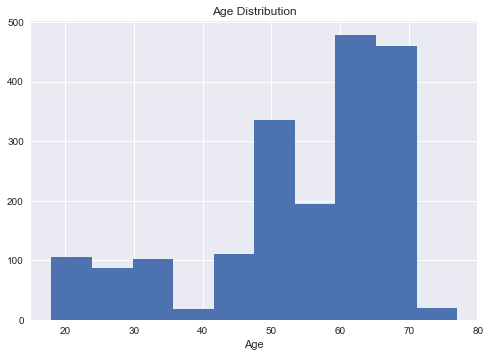

In [10]:
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

## Patients under 50  

Number of Patients under 50: 442
Percentage of dataset: 23.020833333333332
Patients under 50 Positive Diagnosis Percentage: 10.633484162895927


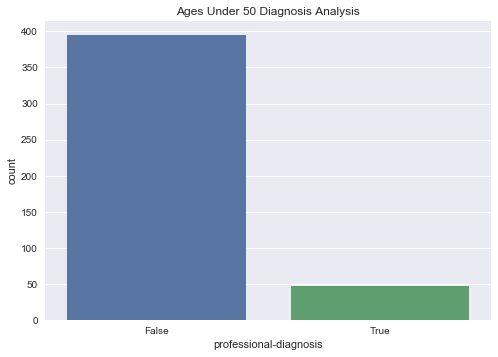

In [11]:
under_50 = df[df['age'] < 50]
under_50_percentage = len(under_50) / len(df) * 100
positive_percentage_under50 = len(under_50[under_50['professional-diagnosis'] == True]) / len(under_50) * 100
print('Number of Patients under 50: {0}'.format(len(under_50)))
print('Percentage of dataset: {0}'.format(under_50_percentage))
print('Patients under 50 Positive Diagnosis Percentage: {0}'.format(positive_percentage_under50))

sb.countplot(x='professional-diagnosis', data=under_50)
plt.title('Ages Under 50 Diagnosis Analysis')
plt.show()

## Patients 50 and Older 

Number of Patients age 50 and older: 1470
Percentage of dataset: 76.5625
Patients over 50 Positive Diagnosis Percentage: 85.17006802721089


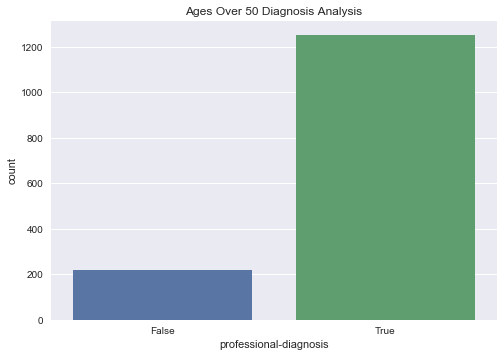

In [12]:
over_50 = df[df['age'] >= 50]
over_50_percentage = len(over_50) / len(df) * 100
positive_percentage_over50 = len(over_50[over_50['professional-diagnosis'] == True]) / len(over_50) * 100
print('Number of Patients age 50 and older: {0}'.format(len(over_50)))
print('Percentage of dataset: {0}'.format(over_50_percentage))
print('Patients over 50 Positive Diagnosis Percentage: {0}'.format(positive_percentage_over50))

sb.countplot(x='professional-diagnosis', data=over_50)
plt.title('Ages Over 50 Diagnosis Analysis')
plt.show()

## Gender Distribution 

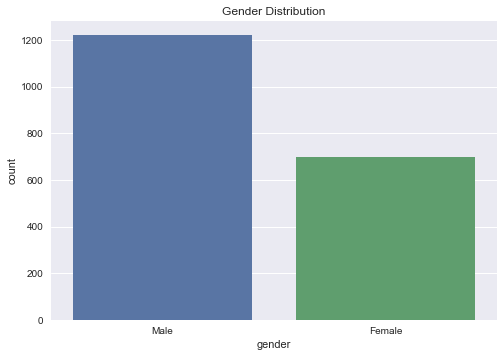

In [13]:
sb.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

## Males 

Number of Male Patients: 1221
Percentage of dataset: 63.59375000000001
Male Positive Diagnosis Percentage: 57.98525798525799


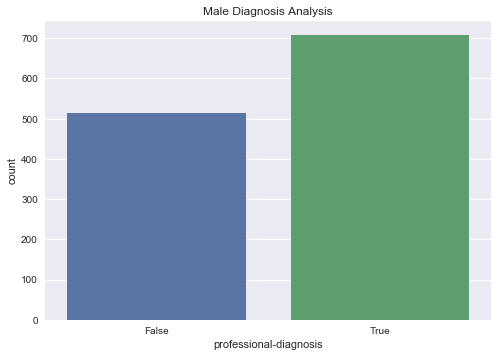

In [14]:
males = df[df['gender'] == 'Male']
male_percentage = len(males) / len(df) * 100
positive_male_percentage = len(males[males['professional-diagnosis'] == True]) / len(males) * 100
print('Number of Male Patients: {0}'.format(len(males)))
print('Percentage of dataset: {0}'.format(male_percentage))
print('Male Positive Diagnosis Percentage: {0}'.format(positive_male_percentage))

sb.countplot(x='professional-diagnosis' , data=males)
plt.title('Male Diagnosis Analysis')
plt.show()

## Females 

Number of Female Patients: 699
Percentage of dataset: 36.40625
Female Positive Diagnosis Percentage: 85.26466380543634


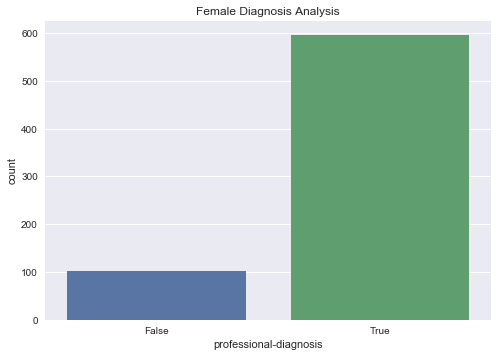

In [15]:
females = df[df['gender'] == 'Female']
female_percentage = len(females) / len(df) * 100
positive_female_percentage = len(females[females['professional-diagnosis'] == True]) / len(females) * 100
print('Number of Female Patients: {0}'.format(len(females)))
print('Percentage of dataset: {0}'.format(female_percentage))
print('Female Positive Diagnosis Percentage: {0}'.format(positive_female_percentage))

sb.countplot(x='professional-diagnosis' , data=females)
plt.title('Female Diagnosis Analysis')
plt.show()

## Males Under 50 

Number of Male Patients under 50: 397
Percentage of dataset: 20.677083333333332
Male Patients under 50 Positive Diagnosis Percentage: 11.838790931989925


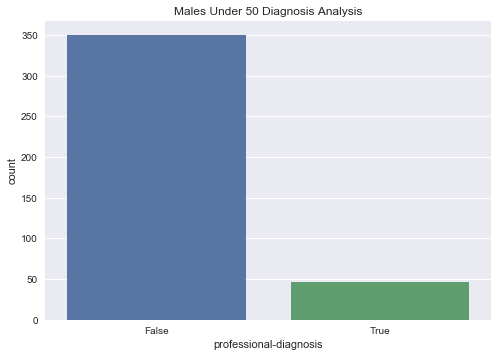

In [16]:
males_under_50 = males[males['age'] < 50]
male_under_50_percentage = len(males_under_50) / len(df) * 100
positive_male_under_50_percentage = len(males_under_50[males_under_50['professional-diagnosis'] == True]) / len(males_under_50) * 100
print('Number of Male Patients under 50: {0}'.format(len(males_under_50)))
print('Percentage of dataset: {0}'.format(male_under_50_percentage))
print('Male Patients under 50 Positive Diagnosis Percentage: {0}'.format(positive_male_under_50_percentage))

sb.countplot(x='professional-diagnosis' , data=males_under_50)
plt.title('Males Under 50 Diagnosis Analysis')
plt.show()

## Males Over 50 

Number of Male Patients over 50: 824
Percentage of dataset: 42.916666666666664
Male Patients over 50 Positive Diagnosis Percentage: 80.21844660194175


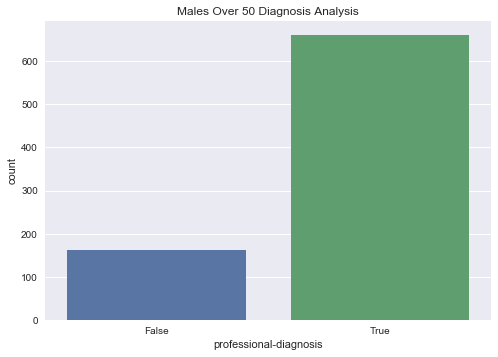

In [17]:
males_over_50 = males[males['age'] >= 50]
male_over_50_percentage = len(males_over_50) / len(df) * 100
positive_male_over_50_percentage = len(males_over_50[males_over_50['professional-diagnosis'] == True]) / len(males_over_50) * 100
print('Number of Male Patients over 50: {0}'.format(len(males_over_50)))
print('Percentage of dataset: {0}'.format(male_over_50_percentage))
print('Male Patients over 50 Positive Diagnosis Percentage: {0}'.format(positive_male_over_50_percentage))

sb.countplot(x='professional-diagnosis' , data=males_over_50)
plt.title('Males Over 50 Diagnosis Analysis')
plt.show()

## Females Under 50 

Number of Female Patients under 50: 45
Percentage of dataset: 2.34375
Female Patients under 50 Positive Diagnosis Percentage: 0.0


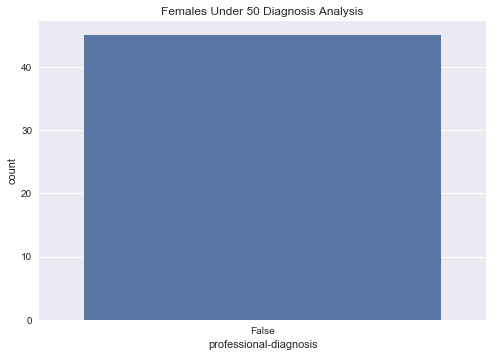

In [18]:
females_under_50 = females[females['age'] < 50]
female_under_50_percentage = len(females_under_50) / len(df) * 100
positive_female_under_50_percentage = len(females_under_50[females_under_50['professional-diagnosis'] == True]) / len(females_under_50) * 100
print('Number of Female Patients under 50: {0}'.format(len(females_under_50)))
print('Percentage of dataset: {0}'.format(female_under_50_percentage))
print('Female Patients under 50 Positive Diagnosis Percentage: {0}'.format(positive_female_under_50_percentage))

sb.countplot(x='professional-diagnosis' , data=females_under_50)
plt.title('Females Under 50 Diagnosis Analysis')
plt.show()

## Females Over 50 

Number of Female Patients over 50: 646
Percentage of dataset: 33.645833333333336
Male Patients over 50 Positive Diagnosis Percentage: 91.48606811145511


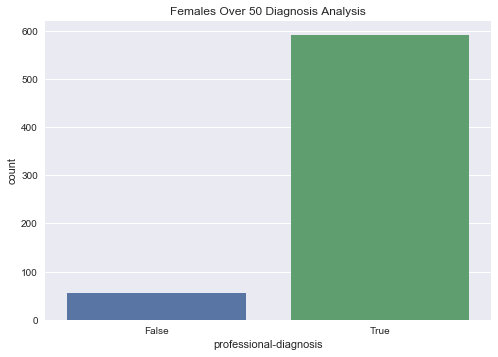

In [19]:
females_over_50 = females[females['age'] >= 50]
female_over_50_percentage = len(females_over_50) / len(df) * 100
positive_female_over_50_percentage = len(females_over_50[females_over_50['professional-diagnosis'] == True]) / len(females_over_50) * 100
print('Number of Female Patients over 50: {0}'.format(len(females_over_50)))
print('Percentage of dataset: {0}'.format(female_over_50_percentage))
print('Male Patients over 50 Positive Diagnosis Percentage: {0}'.format(positive_female_over_50_percentage))

sb.countplot(x='professional-diagnosis' , data=females_over_50)
plt.title('Females Over 50 Diagnosis Analysis')
plt.show()

As mentioned before, this dataset only contains a fraction of the entire experiment's data so insights gained here could be thwarted if the entire dataset was explored. Also the diagnosis class of the data has not been observed yet so that needs to be taken into account. However observing the data that we have, let's answer the questions that we had earlier.

-  It appears that the age of the patients seem to be skewed towards the right of 50 and older, this would make sense as according to Parkinson's Disease research, the average age of positively diagnosed patients is 60
-  That research is somewhat validated here as only 10.6% of patients in this data under 50 were diagnosed with Parkinson's as opposed to 85% of patients over 50 being diagnosed positively
-  There are also more males than females in this dataset with an approximate 65-35 split. This also makes sense as males are more likely to be diagnosed than females. Interestingly, 85% of the female instances in this dataset were positively diagnosed - this is not completely abnormal due to their small sample size within the dataset as well as the entirety of the dataset not being complete
-  Overlapping these two categories, males over the age of 50 are the most common in this dataset accounting for 42% with 82% of them being diagnosed positively. Females over 50 are next accounting for 33% and 91% of them being diagnosed positively. Not suprisingly, there are no females under 50 who were diagnosed with Parkinsons's and only 12% of males under 50 where diagnosed positively

# Target Class Balance 

Number of Positive Instances: 1304
Number of Negative Instances: 616


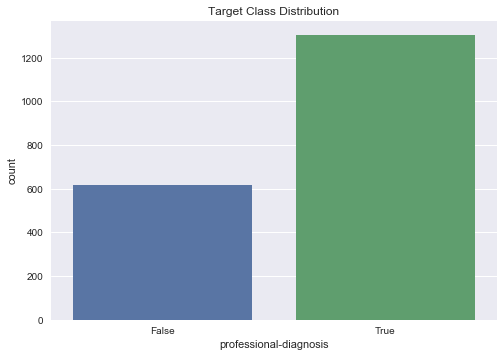

In [20]:
positive = len(df[df['professional-diagnosis'] == True])
negative = len(df[df['professional-diagnosis'] == False])

print('Number of Positive Instances: {0}'.format(positive))
print('Number of Negative Instances: {0}'.format(negative))

sb.countplot(x='professional-diagnosis', data=df)
plt.title('Target Class Distribution')
plt.show()

In this dataset there is a pretty heavy target class imbalance with a positive diagnosis occuring 1304 times out of 1920 instances. This means that guessing a patient from this dataset is diagnosed with Parkinson's Disease will be correct 68% of the time. Moving forward this is good to know when evaluating our model's predictive performance. This information also leads us to choosing models that perform better with a target class imbalance. Some initial thoughts on algorithms that should perform better with a class imbalances are ensemble methods incorporating bagging and boosting. These will be explained more in depth in the next notebook containing prediction models. 

# Feature Distribution Analysis

A gaussian or normal distribution can be depicted as a symmetrical bell curve. A key characteristic of guassian distributions is that the mean, median, and mode all share the same value. 

Skewness is essentially a measure of a distribution's asymmetry. The most important aspect of a skewed distribution is that the skewness does not determine the relationship of mean and median. In cases where it is necessary such as prediction, data might be transformed to have a normal distribution.

Exponential distribution is a statistical distribution used to model the time between independent events that happen at a constant average rate. In the context of this data, the features extracted here are based off patient accerelation over periods of time which could lead to some features showing an exponential distribution.

Key questions regarding feature distribution:
-  Which features have gaussian distributions?
-  Which have skewed distributions? 
-  Which have exponential distributions?

In [21]:
df.describe()

,age,meanXaccel,medianXaccel,stdXaccel,skewXaccel,kurtXaccel,rangeXaccel,variationXaccel,meanYaccel,medianYaccel,...,kurtYaccel,rangeYaccel,variationYaccel,meanZaccel,medianZaccel,stdZaccel,skewZaccel,kurtZaccel,rangeZaccel,variationZaccel
count,1912.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,54.266213,-0.001793,0.000834,0.234225,0.149205,9.211719,7.809693,-73.326385,0.016520,0.000722,...,16.656197,12.603993,15.966646,-0.001789,0.000020,0.231559,-0.271417,21.645097,12.287995,580.651202
std,13.941635,0.004133,0.001684,0.024383,0.177237,0.917553,1.027778,2656.888366,0.003567,0.001674,...,2.423943,2.080287,2.541103,0.006634,0.004250,0.018157,0.545366,4.093416,1.532039,22630.676389
min,18.000000,-0.060817,-0.039582,0.163443,-0.969447,0.141505,1.508230,-73751.448514,0.012261,-0.000906,...,-0.210016,1.895134,3.992016,-0.104390,-0.152150,0.204124,-1.970048,0.544279,3.060726,-90703.294424
25%,53.000000,-0.005088,0.000058,0.219771,0.059303,8.977803,7.555207,-72.377902,0.014574,-0.000068,...,16.172827,13.268981,14.971036,-0.003057,-0.000043,0.223766,-0.502083,18.621202,11.143338,-88.500680
50%,60.000000,-0.002605,0.000254,0.221635,0.095018,9.340599,8.061547,-38.187501,0.015693,0.000120,...,17.560100,13.737580,15.745528,-0.000124,0.000382,0.226728,-0.033984,21.140980,13.486719,-22.841307
75%,66.000000,0.001278,0.001586,0.250886,0.121648,9.585976,8.592721,64.582883,0.016305,0.001679,...,17.884109,13.737580,17.245262,0.001076,0.000502,0.238778,0.127868,23.702951,13.486719,185.160627
max,77.000000,0.016124,0.023553,0.328049,0.618566,11.464604,8.592721,21099.085196,0.056733,0.029125,...,19.397320,14.127019,21.209285,0.004392,0.011845,0.475797,0.726143,33.992827,13.486719,983536.793692


In [22]:
# visualize features by axis

x_features = [col for col in df if 'X' in col]
y_features = [col for col in df if 'Y' in col]
z_features = [col for col in df if 'Z' in col]

## Histograms 

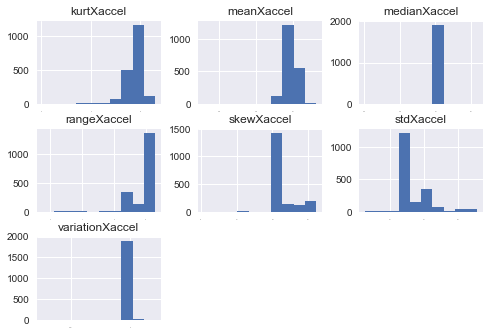

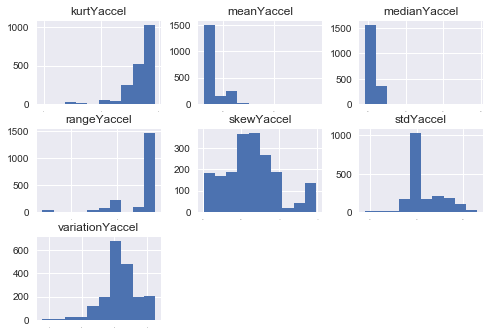

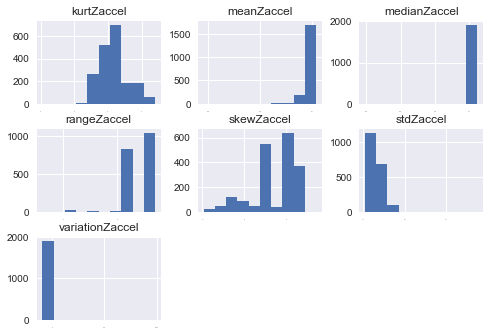

In [23]:
df[x_features].hist(sharex=False, sharey=False, xlabelsize=1)
df[y_features].hist(sharex=False, sharey=False, xlabelsize=1)
df[z_features].hist(sharex=False, sharey=False, xlabelsize=1)

plt.show()

## Density Plot 

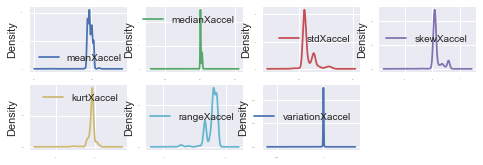

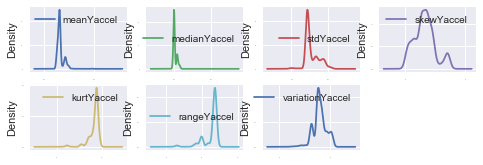

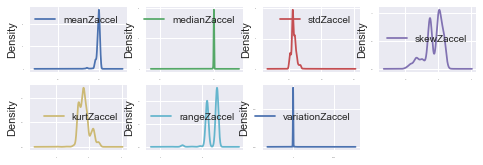

In [24]:
df[x_features].plot(kind='density', subplots=True, layout=(4,4), 
    sharex=False,legend=True, fontsize=0.5 )
df[y_features].plot(kind='density', subplots=True, layout=(4,4), 
    sharex=False,legend=True, fontsize=0.5 )
df[z_features].plot(kind='density', subplots=True, layout=(4,4), 
    sharex=False,legend=True, fontsize=0.5 )
plt.show()

## Box Plot 

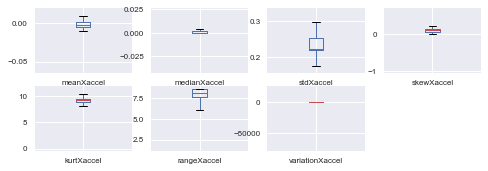

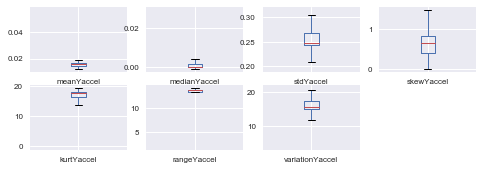

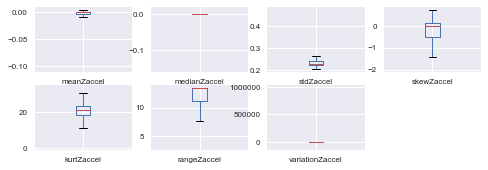

In [25]:
df[x_features].plot(kind='box', subplots=True, layout=(4,4), sharex=False,
        sharey=False, fontsize=8)
df[y_features].plot(kind='box', subplots=True, layout=(4,4), sharex=False,
        sharey=False, fontsize=8)
df[z_features].plot(kind='box', subplots=True, layout=(4,4), sharex=False,
        sharey=False, fontsize=8)
plt.show()

It appears that most features in the raw state do not contain a gaussian distribution. This is important because for the purpose of this binary classification project, algorithms such as Logistic Regression assume a gaussian distribution and its performance can suffer. Some features such as kurtXAccel and kurtYAccel appear to have exponential distributions. Some skewed distributions appear to be shown by variationYAccel and KurtZAccel. A couple features that are candidates to be dropped when the time comes for prediction and variationXAccel and variationZAccel.

With the scarcity of normal distributions within the features it appears that scaling could help us with prediction performance. It will be interesting to see the impact of scaling quantitatively and will be shown in the next notebook.


# Correlation Analysis 

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together, then they are negatively correlated. The metric to calculate correlation that is commonly used is the Pearson's Correlation Coeffecient.

Questions regarding correlation:
-  Which features are positively correlated with one another?
-  Which features are negatively correlated with one another?

In [26]:
df.corr()

,age,meanXaccel,medianXaccel,stdXaccel,skewXaccel,kurtXaccel,rangeXaccel,variationXaccel,meanYaccel,medianYaccel,...,kurtYaccel,rangeYaccel,variationYaccel,meanZaccel,medianZaccel,stdZaccel,skewZaccel,kurtZaccel,rangeZaccel,variationZaccel
age,1.000000,-0.008468,0.010886,0.069865,-0.014582,-0.128606,0.109175,-0.006345,-0.086319,0.047809,...,0.013984,0.151271,0.105092,0.088888,0.048780,0.112444,0.148497,-0.181526,0.128477,0.021032
meanXaccel,-0.008468,1.000000,0.677604,0.377865,0.536463,0.156054,-0.264793,0.009365,0.619601,0.254879,...,-0.200545,-0.420693,-0.690892,0.050767,0.186519,0.455207,-0.239792,0.219428,-0.030785,0.036171
medianXaccel,0.010886,0.677604,1.000000,0.437175,0.369156,-0.008767,-0.406497,0.036835,0.556312,0.569305,...,-0.363580,-0.447982,-0.368064,-0.196309,0.181992,0.432543,-0.451097,0.169249,-0.323068,0.021924
stdXaccel,0.069865,0.377865,0.437175,1.000000,0.800472,-0.064005,-0.443559,0.052515,0.485250,0.456837,...,-0.477378,-0.519661,-0.191989,-0.157846,-0.012948,0.452901,-0.728012,0.483194,-0.398622,0.081359
skewXaccel,-0.014582,0.536463,0.369156,0.800472,1.000000,0.302956,-0.322798,0.043659,0.428612,0.198768,...,-0.160866,-0.429586,-0.378676,0.122381,0.164203,0.165828,-0.582019,0.684790,-0.151178,0.049057
kurtXaccel,-0.128606,0.156054,-0.008767,-0.064005,0.302956,1.000000,0.549545,-0.013486,-0.336707,-0.327308,...,0.758075,0.444561,0.184439,0.683003,0.346795,-0.619532,0.238214,0.352845,0.501481,-0.039788
rangeXaccel,0.109175,-0.264793,-0.406497,-0.443559,-0.322798,0.549545,1.000000,-0.070730,-0.759227,-0.499061,...,0.876112,0.950067,0.552894,0.796020,0.307046,-0.642719,0.810604,-0.197745,0.855374,-0.023586
variationXaccel,-0.006345,0.009365,0.036835,0.052515,0.043659,-0.013486,-0.070730,1.000000,0.022627,0.044378,...,-0.046464,-0.048208,0.005104,-0.036900,-0.007904,0.031867,-0.059143,0.012573,-0.060107,0.000827
meanYaccel,-0.086319,0.619601,0.556312,0.485250,0.428612,-0.336707,-0.759227,0.022627,1.000000,0.652157,...,-0.685131,-0.844770,-0.848130,-0.541218,-0.380203,0.799254,-0.583239,0.258544,-0.514497,0.054384
medianYaccel,0.047809,0.254879,0.569305,0.456837,0.198768,-0.327308,-0.499061,0.044378,0.652157,1.000000,...,-0.552470,-0.459022,-0.299398,-0.558545,-0.488905,0.719229,-0.363028,-0.069321,-0.450473,0.020823


## Correlation Matrix 

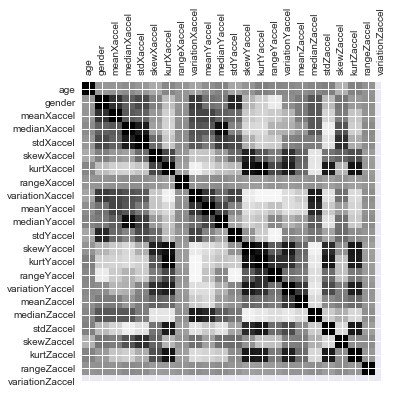

In [27]:
non_feature_cols = ['recordId', 'healthCode', 'professional-diagnosis']
features = [col for col in df if col not in non_feature_cols]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(pd.DataFrame.corr(df), vmin=-1, vmax=1, interpolation='none')
fig.colorbar=(cax)
ticks = np.arange(0, 23, 1)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(df[features].columns, rotation='vertical')
ax.set_yticklabels(df[features].columns)
plt.show()

The black represents higher correlation and white represents the opposite. As one would expect the diagonal across represents the correlation of features with itself. The Z axis features seem to be less correlated than the Y and X axis features while the X and Y axis features appear the share more correlation.